# Выбор локации для скважины

### Описание проекта
Добывающей компании «ГлавРосГосНефть» необходимо принять решение, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. (проанализировать возможную прибыль и риски техникой *Bootstrap.*)

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (они значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
# Загрузим необходимые бибилиотеки
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [4]:
# загрузим данные
# data = pd.read_csv('/datasets/')
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
# посмотрим на размер датасета
data_0.shape, data_1.shape, data_2.shape

((100000, 5), (100000, 5), (100000, 5))

1. Загрузите и подготовьте данные. Поясните порядок действий.


### Проверка на пропуски

In [6]:
# посмотрим информацию по каждому полю
data_0.info(), data_1.info(), data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

(None, None, None)

In [7]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Пропусков в данных нет

### Проверка на дубликаты

In [8]:
data_0.duplicated().sum(), data_1.duplicated().sum(), data_2.duplicated().sum()

(0, 0, 0)

Дубликатов не обнаружено

### Смотрим выбросы

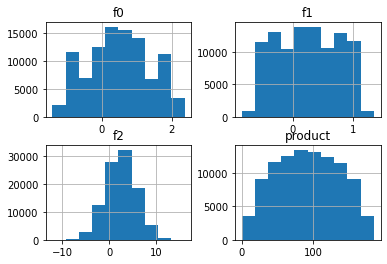

In [9]:
data_0.hist()
plt.show()

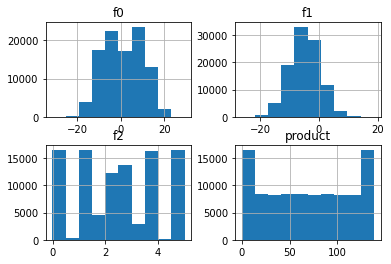

In [10]:
data_1.hist()
plt.show()

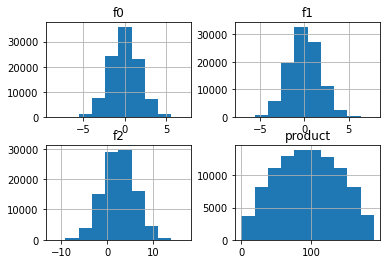

In [11]:
data_2.hist()
plt.show()

Во всех трёх датасетах данные не вызывают вопросов по выбросам 

## Обучение и проверка модели

In [19]:
# Метод обучения модели и прогнозирования
def line_model(data):
    # зададим целевой признак и подготовим данные
    target = data['product']
    features = data.drop(['product', 'id'], axis=1)
    
    # Разбьём данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train,target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=12345)
    
    # инициируем модели линейной регрессии
    model = LinearRegression()
    # обучим модель
    model.fit(features_train, target_train)
    # сделаем прогнозы
    predicted_valid = model.predict(features_valid)
    
    # посчитаем rmse
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    # посчитаем средний запас сырья
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid)
    
    return target_valid, predicted_valid, rmse, predicted_valid_mean

In [20]:
# получим основные показатели для каждого региона
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = line_model(data_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = line_model(data_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = line_model(data_2)

In [21]:
print('Регион_0. Средний запас сырья:', predicted_valid_mean_0, 'rmse:', rmse_0)
print('Регион_1. Средний запас сырья:', predicted_valid_mean_1, 'rmse:', rmse_1)
print('Регион_2. Средний запас сырья:', predicted_valid_mean_2, 'rmse:', rmse_2)

Регион_0. Средний запас сырья: 92.59256778438035 rmse: 37.5794217150813
Регион_1. Средний запас сырья: 68.728546895446 rmse: 0.893099286775617
Регион_2. Средний запас сырья: 94.96504596800489 rmse: 40.02970873393434


## Подготовка к расчёту прибыли

In [22]:
# Все ключевые значения для расчётов сохраним в отдельных переменных.
REGION_BUDGET_RUB = 10*10**9 # Бюджет на разработку 200 скважин в регионе
TOTAL_QUANTITY_POINTS = 500 # При разведке региона исследуют 500 точек
SELECTED_QUANTITY_POINTS = 200 # с помощью машинного обучения выбирают 200 точек лучших для разработки
BUDGET_QUANTITY_POINTS_RUB = REGION_BUDGET_RUB / SELECTED_QUANTITY_POINTS
BARREL_INCOME_RUB = 450 # доход с каждого барреля
PRODUCT_UNITS_INCOME_RUB = 450 * 10**3 # доход с каждой единицы продукта
LOSS_PROBABILITY_THRESHOLD_PERSENT = 2,5 # порог вероятности убытков, максимальное допустимое значение

In [23]:
# Рассчитайем достаточный объём сырья для безубыточной разработки новой скважины.
min_volume_materials = REGION_BUDGET_RUB / SELECTED_QUANTITY_POINTS / BARREL_INCOME_RUB
print(f'Достаточный объём сырья для безубыточной \
разработки новой скважины равен {int(min_volume_materials)} барреля \
или {round(min_volume_materials/1000, 3)} единицы продукта (тыс. баррелей)')

Достаточный объём сырья для безубыточной разработки новой скважины равен 111111 барреля или 111.111 единицы продукта (тыс. баррелей)


In [24]:
# отклонение от среднего в регионе_0
predicted_valid_mean_0*1000 - min_volume_materials

-18518.543326730753

In [25]:
# отклонение от среднего в регионе_1
predicted_valid_mean_1*1000 - min_volume_materials

-42382.5642156651

In [26]:
# отклонение от среднего в регионе_2
predicted_valid_mean_2*1000 - min_volume_materials

-16146.065143106229

In [27]:
print('Средняя расчетная прибыль региона_0',\
      SELECTED_QUANTITY_POINTS *\
      predicted_valid_mean_0 *\
     PRODUCT_UNITS_INCOME_RUB\
     - REGION_BUDGET_RUB)
print('Средняя расчетная прибыль региона_1',\
      SELECTED_QUANTITY_POINTS *\
      predicted_valid_mean_1 *\
     PRODUCT_UNITS_INCOME_RUB\
     - REGION_BUDGET_RUB)
print('Средняя расчетная прибыль региона_2',\
      SELECTED_QUANTITY_POINTS *\
      predicted_valid_mean_2 *\
     PRODUCT_UNITS_INCOME_RUB\
     - REGION_BUDGET_RUB)

Средняя расчетная прибыль региона_0 -1666668899.4057684
Средняя расчетная прибыль региона_1 -3814430779.4098606
Средняя расчетная прибыль региона_2 -1453145862.8795605


В каждом из трёх регионов средни запас сырья скважины меньше полученного значения достаточного объёма сырья на 18.5, 42.3, 16.1 тыс. баррелей. На основании данного заключения можно отметить высокий риск разработок скважин преимущественно в регионе_1

## Расчёт прибыли и рисков 

приведем целевые и прогнозные значения к одному типу

In [28]:
# метод для приведения к типу Series
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

In [29]:
# приведем целевые и прогнозные значения по всем регионам к одному типу
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

In [30]:
# метод расчёта прибыли (фактическая выручка с 200 лучших по прогнозу скважин, минус инвестиции)
def total_income(target, probabilities, count, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB):
    prob_sort = probabilities.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int(PRODUCT_UNITS_INCOME_RUB * selected.sum() - REGION_BUDGET_RUB)

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [31]:
# метод получения основных расчётных параметров с помощью будстрепа
def bootstrap_regions(target, predicted, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB):
    state = RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = TOTAL_QUANTITY_POINTS, replace=True, random_state=state)
        pred_subsumple = predicted[target_subsample.index]

        values.append(total_income(target_subsample, pred_subsumple, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = int(len(values[values < 0]) / len(values) * 100)
    return values_mean, lower, upper, risk


In [32]:
 #Посчитаем основные параметры для трёх регионов
values_mean_0, lower_0, upper_0, risk_0  = bootstrap_regions(target_valid_0, predicted_valid_0, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB)
values_mean_1, lower_1, upper_1, risk_1  = bootstrap_regions(target_valid_1, predicted_valid_1, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB)
values_mean_2, lower_2, upper_2, risk_2  = bootstrap_regions(target_valid_2, predicted_valid_2, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB)

In [33]:
print('Средняя прибыль лучших месторождений региона_0 равна', values_mean_0)
print('Средняя прибыль лучших месторождений региона_1 равна', values_mean_1)
print('Средняя прибыль лучших месторождений региона_2 равна', values_mean_2)

Средняя прибыль лучших месторождений региона_0 равна 425938526
Средняя прибыль лучших месторождений региона_1 равна 515222772
Средняя прибыль лучших месторождений региона_2 равна 435008362


In [34]:
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона_0', lower_0, upper_0)
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона_1', lower_1, upper_1)
print('95% доверительный интервал для средней прибыли 200 лучших месторождений региона_2', lower_2, upper_2)

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_0 -102090093 947976352
95% доверительный интервал для средней прибыли 200 лучших месторождений региона_1 68873225 931547590
95% доверительный интервал для средней прибыли 200 лучших месторождений региона_2 -128880546 969706953


In [35]:
print('Риск убытков региона_0 равен', risk_0, '%')
print('Риск убытков региона_1 равен', risk_1, '%')
print('Риск убытков региона_2 равен', risk_2, '%')

Риск убытков региона_0 равен 6 %
Риск убытков региона_1 равен 1 %
Риск убытков региона_2 равен 6 %


### Выводы
В рамках исследования проведена загрузка и подготовка данных, обучена модель линейной регрессии, и подготовлен прогноз запасов для скважин трёх регионов. 

Регион_0. Средний запас сырья: 92.59 тыс. баррелей  rmse: 37.5794217150813
Регион_1. Средний запас сырья: 68.72 тыс. баррелей rmse: 0.8930992867756155
Регион_2. Средний запас сырья: 94.96 тыс. баррелей  rmse: 40.02970873393434

Достаточный объём сырья для безубыточной разработки новой скважины равен 111111 барреля или 111.111 единицы продукта (тыс. баррелей)

В каждом из трёх регионов средний запас сырья скважины меньше полученного значения достаточного объёма сырья на 18.5, 42.3, 16.1 тыс. баррелей.

Применили технику Bootstrap с 1000 выборок, для нахождения распределение прибыли

Средняя прибыль лучших месторождений региона_0 равна 425 938 526 руб.

Средняя прибыль лучших месторождений региона_1 равна 515 222 772 руб.

Средняя прибыль лучших месторождений региона_2 равна 435 008 362 руб.

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_0:  -102090093, 947976352

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_1:  68873225, 931547590

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_2:  -128880546, 969706953

Риск убытков региона_0 равен 6 %

Риск убытков региона_1 равен 1 %

Риск убытков региона_2 равен 6 %

На основании полученных данных можно сделать вывод, что регион 1 является наиболее привлекательным для разработки.
Самая высокая прибыль лучших месторождений, более узкие рамки доверительного интервала и наименьший риск получения убытков позволяют обосновать соответствующий вывод по региону_1.

Данный регион рекомендован к освоению.